In [250]:
import pandas as pd

In [251]:
data = pd.read_csv('data/jobs.csv',encoding = 'latin1')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company                     3197 non-null   object
 1   Job Title                   3197 non-null   object
 2   Location                    3197 non-null   object
 3   Job Type                    3197 non-null   object
 4   Experience level            2962 non-null   object
 5   Salary                      3009 non-null   object
 6   Requirment of the company   3198 non-null   object
 7   Facilities                  3198 non-null   object
dtypes: object(8)
memory usage: 200.0+ KB


<h4>Cleanning</h4>

In [252]:
#check duplicated
data.duplicated().sum()

202

In [253]:
#remove duplicated
data.drop_duplicates(inplace=True)

In [254]:
#check null in data
data.isna().sum()

Company                         1
Job Title                       1
Location                        1
Job Type                        1
Experience level              228
Salary                        172
Requirment of the company       0
Facilities                      0
dtype: int64

In [255]:
#Drop rows null
data.drop(index=data.loc[data['Company'].isna()].index,inplace=True)

In [256]:
#Replace data null of Experience column with 'No experience'
data['Experience level'].fillna('No specific',inplace=True)

In [257]:
#Replace data null of Salary column with 'No salary'
data['Salary'].fillna('0',inplace=True)

In [258]:
import re

def cleanSalary(salary):
    currency_paterns = re.compile("["
                                  u"GBP"
                                  u"EUR"
                                  u"+"
                                  u"K"
                                  u"*"
                                  "]+",flags=re.UNICODE)

    return int(currency_paterns.sub(r'',salary))*1000
 
data['Salary'] = data['Salary'].apply(lambda x:cleanSalary(x))

In [259]:
#Drop Salary equal zero where Experience level defferent Entership
indexs = data.loc[(data['Salary'] == 0) & (data['Job Type'] != 'Internship')].index

data.drop(index=indexs,inplace=True)

In [260]:
#!pip install pycountry
import pycountry

In [261]:
def getCountryFromLocation(txt):
    for country in pycountry.countries:
        if country.name in txt or country.alpha_3 in txt:
            ctry = country.name
            break
        else:
            ctry = txt
    return ctry


data['country'] = data['Location'].apply(lambda x:getCountryFromLocation(x))

In [263]:

#BI, Big Data, Data Analyst, Data Analysis, Data Sience, Data Scientist, Data Engineer, Data Engineering
def getSubTitleJob(t):
    if ('Data Engineer'.upper() in t.upper()) | ('Data Engineering'.upper() in t.upper()):
        return 'Data Engineer'.title()
    elif ('BI'.upper() in t.upper()) | ('Business Intelligence'.upper() in t.upper()):
        return 'Business Intelligence'.title()
    elif ('Big Data'.upper() in t.upper()):
        return 'Big Data'.title()
    elif ('Data Analyst'.upper() in t.upper()) | ('Data Analysis'.upper() in t.upper()) | ('Data Analytics'.upper() in t.upper()):
        return 'Data Analyst'.title()
    elif ('Data Science'.upper() in t.upper()) | ('Data Scientist'.upper() in t.upper()):
        return 'Data Science'.title()
    elif ('Machine Learning'.upper() in t.upper()) | ('ML'.upper() in t.upper()):
        return 'Machine Learning'.title()
    elif ('AI'.upper() in t.upper()) | ('Artificial Intelligence'.upper() in t.upper()):
        return 'Artificial Intelligence'
    else:
        return t

data['New Job Title'] = data['Job Title'].apply(lambda x:getSubTitleJob(x))

In [264]:
#Export data cleaned to csv
data.to_csv('data/cleaned_jobs.csv')

<h4>Analyse and visualization</h4>

In [265]:
from bokeh.plotting import figure,show
from bokeh.io import output_notebook
from bokeh.palettes import Accent6,Blues5,Category20c
import matplotlib.pyplot as plt


output_notebook()

Loading BokehJS ...

In [266]:
data = pd.read_csv('data/cleaned_jobs.csv',index_col=0)

In [267]:
#Opportunities by country
d = data.loc[data['country'] != 'Remote'].groupby('country')['country'].count().sort_values(ascending=False).head(10).reset_index(name='counts').sort_values(by='counts',ascending=True)

#create bars
p = figure(y_range=d['country'],x_range=(0,max(d['counts'])),title=f'',tools='hover',tooltips='Opportunités : @counts')
p.hbar(y='country',right='counts',height=0.90,source=d)
show(p)

In [268]:
#Opportunities by companies
d = data.groupby('Company')['Company'].count().sort_values(ascending=False).reset_index(name='counts').head(50)
#create bars
p = figure(x_range=d['Company'],y_range=(0,max(d['counts'])),title=f'',tools='hover',tooltips='Company : @Company - Opportunités : @counts')
p.vbar(x='Company',top='counts',width=0.90,source=d)

p.xaxis.major_label_orientation = 4/-3

show(p)

In [269]:
#Job title more required
d = data.groupby('New Job Title')['New Job Title'].count().sort_values(ascending=False).reset_index(name='counts').rename(columns={'New Job Title':'Job_Title'}).head(10)

p = figure(x_range=d['Job_Title'],y_range=(0,max(d['counts'])),title=f'',tools='hover',tooltips='Job Title : @Job_Title - Opportunités : @counts')
p.vbar(x='Job_Title',top='counts',width=0.90,source=d)

p.xaxis.major_label_orientation = 4/-3

show(p)

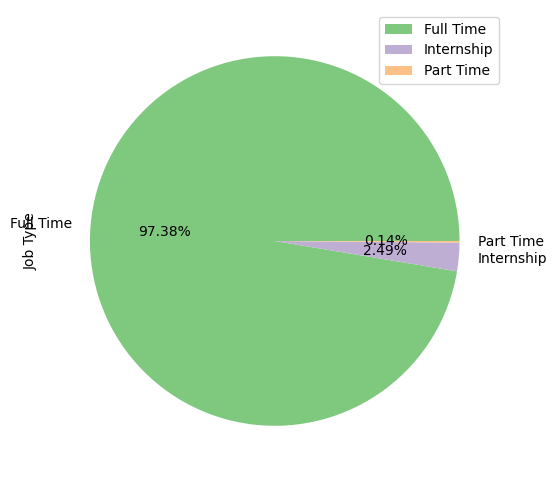

In [206]:

#Counts of opportunities by Jop Typs
d = data.groupby(by='Job Type')['Job Type'].count()

dd = pd.DataFrame(d,index=['Full Time','Internship','Part Time'])

dd.plot.pie(y='Job Type',autopct="%.2f%%", colors=Accent6,figsize=(6, 6))

plt.show()

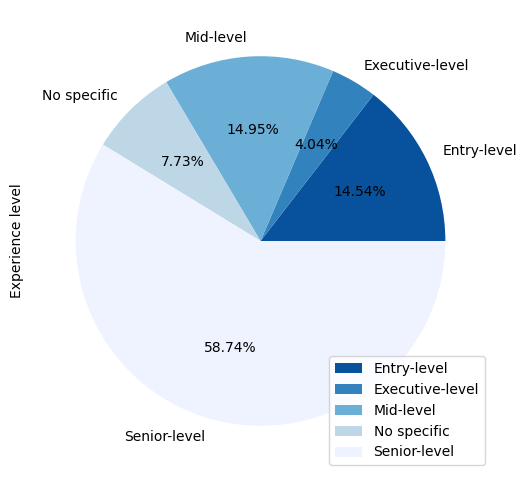

In [207]:
#Counts of opportunities by experience level
d = data.groupby('Experience level')['Experience level'].count()

dd = pd.DataFrame(d,index=['Entry-level','Executive-level','Mid-level','No specific','Senior-level'])

dd.plot.pie(y='Experience level',autopct="%.2f%%", colors=Blues5,figsize=(6, 6))

plt.show()

In [208]:
#Top salary by job title
data.groupby('Job Title')['Salary'].max().sort_values(ascending=False).head(50)

Job Title
Senior/Principal ML Engineer, Content Understanding                     315000
Data Sience                                                             310000
Principal Engineer, Datacenter Software Systems                         283000
Principal Deep Learning Engineer - Computer Vision                      283000
Principal Software Engineer, Applied ML                                 283000
Machine Learning                                                        283000
Data Engineer                                                           283000
Research Engineer, Privacy                                              245000
Staff Database Reliability Engineer, Datastores                         236000
Senior Engineering Manager, Data Management                             235000
Senior Staff Applied Research Scientist, Perception                     234000
Staff Software Engineer - Streaming Data Pipelines                      214000
Senior Stability Analytics Engineer       

In [110]:
#Requirment of the company
requirments = []
for index,row in data.iterrows():
    requirments.extend(row['Requirment of the company '].split(','))

requirments = pd.DataFrame(requirments)

indexs = requirments.loc[requirments[0] == ''].index

requirments.drop(index=indexs,inplace=True)


dr = requirments.groupby([0])[0].count().sort_values(ascending=False).head(20)

data_dr = dr.reset_index(name='counts')

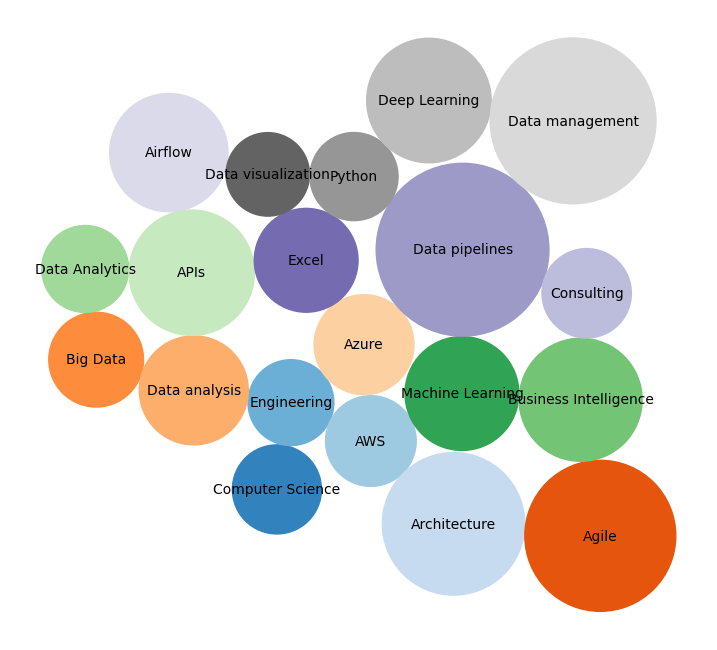

In [111]:
from bubble_chart import BubbleChart

#random data
data_dr_r = data_dr.sample(frac=1)

bubble_chart = BubbleChart(area=data_dr_r['counts'],
                           bubble_spacing=0.1)
bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
fig.set_size_inches(9, 13, forward=True)
bubble_chart.plot(
    ax, data_dr_r[0],Category20c[20])
ax.axis("off")
ax.relim()
ax.autoscale_view()
plt.show()